# 牛顿迭代法

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
import math

import utils
utils.use_svg()
sympy.init_printing()

# 取消科学计数法
np.set_printoptions(suppress=True)

## 问题

在区间 $[a, b]$ 上，求方程 $f(x) = 0$ 的根，正常情况下我们很难直接求出解析解，那么我们退而求其次，寻找一个数值解也不错。

例如：在区间 $[0, 1]$ 上，求方程 $f(x) = x^3 + x - 1 = 0$ 的根；

这算是一个稍微简单的问题，下面我们尝试求解析解：

In [2]:
# 定义方程
x = sympy.Symbol('x')
fx = x ** 3 + x - 1
x, fx

In [3]:
# 列出等式
eq = sympy.Eq(fx, 0)
eq

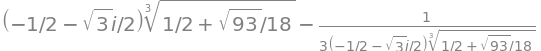

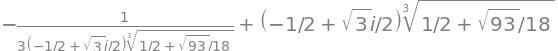

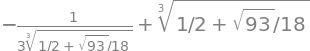

In [4]:
# 求解方程
roots = sympy.solve(eq)
for root in roots:
    display(root)

三次方程有三个解，其中我们只关注实根，另外可以得到它的数值：

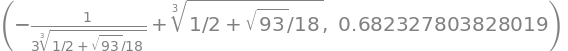

In [5]:
root = roots[2]
nroot = sympy.N(root)
root, nroot

我们可以画出该函数的图像：

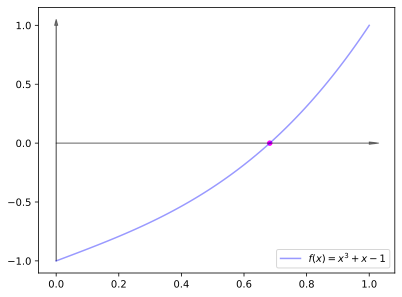

In [6]:
X = np.linspace(0, 1, 100)
FX = sympy.lambdify(x, fx, 'numpy')

ax = plt.figure().add_subplot()
ax.plot(X, FX(X), c='blue', alpha=0.4, label='$f(x) = x^3 + x - 1$')
ax.scatter([nroot], [0], c='magenta', s=20)
ax.arrow(0, -1, 0, 2, head_width=0.01, head_length=0.05, color='black', alpha=0.5)
ax.arrow(0, 0, 1, 0, head_width=0.02, head_length=0.03, color='black', alpha=0.5)
ax.legend()
plt.show()

很多时候，我们没有必要求出确切的解析解，一般来说，求解析解需要跟多的计算资源；

只需要一个近似的数值就可以，比如 $\sqrt{2} \approx 1.414$，那么就有几种方法来求得这个数值。

## 对分法（二分查找）

零点定理：如果函数 $f(x)$ 在区间 $[a, b]$ 之间连续并且 $f(a)f(b) < 0$，那么区间 $[a, b]$ 中至少存在一点 $k$ 使得 $f(k) = 0$

如果函数 $f(x)$ 在区间 $[a, b]$ 之间单调，那么 $k$ 唯一；

对于这种函数，我们就可以使用 **对分法**，从计算机的角度来说就是，有序（单调）数组的二分查找。

对于上面的问题：

In [7]:
# 最后的期望误差
err = 0.00001

a = 0
b = 1

result = []
while (b - a) > err:
    r = (b + a) / 2
    result.append(r)
    t = FX(r)
    if t == 0:
        break
    if t > 0:
        b = r
    else:
        a = r

result = np.array(result)
print(f'iter:{len(result)} r:{r} nroot:{nroot} err:{r - nroot}')

iter:17 r:0.6823348999023438 nroot:0.682327803828019 err:0.00000709607432436421


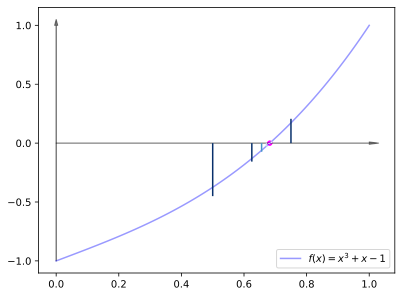

In [8]:
ax = plt.figure().add_subplot()
ax.plot(X, FX(X), c='blue', alpha=0.4, label='$f(x) = x^3 + x - 1$')
ax.scatter([nroot], [0], c='magenta', s=20)
ax.arrow(0, -1, 0, 2, head_width=0.01, head_length=0.05, color='black', alpha=0.5)
ax.arrow(0, 0, 1, 0, head_width=0.02, head_length=0.03, color='black', alpha=0.5)
ax.vlines(x=result, ymin=0, ymax=FX(result) * 1.2, colors=plt.cm.Blues(abs(FX(result)) * 10))
ax.legend()
plt.show()

## 牛顿迭代法

首先计算 $f'(x)$

In [9]:
df = sympy.diff(fx)
DF = sympy.lambdify(x, df, 'numpy')
df

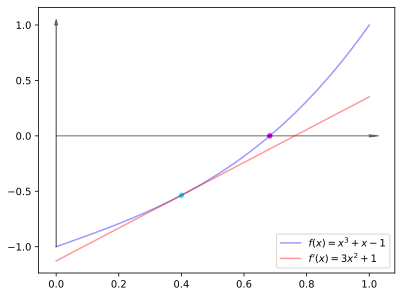

In [10]:
ax = plt.figure().add_subplot()
ax.plot(X, FX(X), c='blue', alpha=0.4, label='$f(x) = x^3 + x - 1$')
ax.plot(X, X * DF(0.4) + FX(0.4) - 0.4 * DF(0.4), c='red', alpha=0.4, label="$f'(x) = 3x^2 + 1$")
ax.scatter([nroot], [0], c='magenta', s=20)
ax.scatter([0.4], [FX(0.4)], c='cyan', s=20)
ax.arrow(0, -1, 0, 2, head_width=0.01, head_length=0.05, color='black', alpha=0.5)
ax.arrow(0, 0, 1, 0, head_width=0.02, head_length=0.03, color='black', alpha=0.5)
ax.legend()
plt.show()

切线在 $x_0$ 的斜率由导数 $f'(x_0)$ 给出，切线上的一点是 $(x_0, f(x_0))$；

直线方程的点斜式是 $y - f(x_0) = f'(x_0)(x - x_0)$；

所以求切线与 $x$ 轴的交点等同与在直线方程中取 $y=0$；

或者，由泰勒公式：

$
\begin{aligned}
f(x) &= f(x_0) + f'(x_0)(x - x_0) + o(x - x_0) \\
f(x) &\approx f(x_0) + f'(x_0)(x - x_0) \\
\end{aligned}
$

于是当 $f(x) = 0$ 时：

$f(x_0) + f'(x_0)(x - x_0) \approx 0$

$\displaystyle x \approx x_0 - {f(x_0) \over f'(x_0)}$


牛顿法：设 $x_0$ 为初始估计，则：

$\displaystyle
x_{i + 1} = x_i - {f(x_i) \over f'(x_i)}, i \in \mathbb{N}
$

In [11]:
x0 = 0.4 # 初始估计
err = 0.00001

result = [x0]
while True:
    x1 = x0 - FX(x0) / DF(x0)
    result.append(x1)
    if abs(x1 - x0) < err:
        r = x0
        break
    x0 = x1

result = np.array(result)
print(f'iter:{len(result)} r:{r} nroot:{nroot} err:{r - nroot}')

iter:6 r:0.6823278042555652 nroot:0.682327803828019 err:4.27545776560123E-10


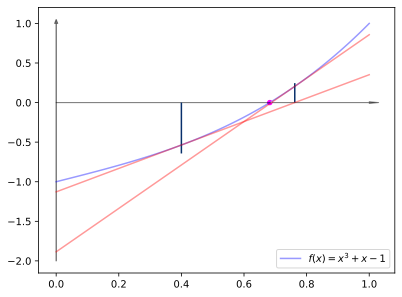

In [12]:
ax = plt.figure().add_subplot()
ax.plot(X, FX(X), c='blue', alpha=0.4, label='$f(x) = x^3 + x - 1$')
ax.scatter([nroot], [0], c='magenta', s=20)
ax.arrow(0, -2, 0, 3, head_width=0.01, head_length=0.05, color='black', alpha=0.5)
ax.arrow(0, 0, 1, 0, head_width=0.02, head_length=0.03, color='black', alpha=0.5)
ax.vlines(x=result, ymin=0, ymax=FX(result) * 1.2, colors=plt.cm.Blues(abs(FX(result)) * 10))
for var in result[:2]:
    ax.plot(X, X * DF(var) + FX(var) - var * DF(var), c='red', alpha=0.4)
ax.legend()
plt.show()

牛顿法可以理解为，斜率为我们指明了前进的方向以及速度，这样我们收敛的就会更快；

很显然，迭代公式中 $f'(x)$ 在分母的位置，这意味着，如果 $f'(x) = 0$ 时，迭代公式将失效

导数为 $0$ 是说我们失去了优化的方向，意味着无论走向那边都一样好，也一样坏。

人生有时候也是一样，我们需要看到比自己好的，同样也要看到比自己坏的，这样就能找到人生的梯度，指明了优化的方向。

## 泰勒公式

若 $p(x)$ 是 $n$ 次多项式:

$$
p(x) = a_0 + a_1 x + a_2 x^2 + \cdots + a_n x^n
$$

对其求导数，于是

$$
\begin{aligned}
p'(x) =& a_1 + 2a_2 x + \cdots + na_n x^{n - 1} \\
p''(x) =& 2a_2 + \cdots + n(n - 1)a_n x^{n - 2} \\
\cdots \\
p^{(n)}(x) =& n!a_n\\
\end{aligned}
$$

令 $x = 0$，于是：

$$
\begin{aligned}
a_0 &= p(0) \\
a_1 &= p'(0) \\
a_2 &= {1 \over 2} p''(0) \\
\cdots \\
a_n &= {1 \over n!} p^{(n)}(0) \\
\end{aligned}
$$

在代入系数得：

$$
p(x) = p(0) + p'(0) x + {p''(0) \over 2} x^2 + {p'''(0) \over 3!} x^3 + \cdots + {p^{(n)}(0) \over n!} x^n
$$

该式称为麦克劳林公式；

与最开始的公式只在于写法不同，利用同样的逻辑我们可以得到 $p(x)$ 在 $x = x_0$ 处的展开式。

$$
p(x) = p(x_0) + p'(x_0)(x - x_0) + {p''(x_0) \over 2} (x - x_0)^2 + {p'''(x_0) \over 3!} (x - x_0)^3 + \cdots + {p^{(n)}(x_0) \over n!} (x - x_0)^n
$$

该式称为泰勒公式；

比如我们可以在 $x = 0$ 处展开 $\sin(x)$ 

$$
\sin(x) = x - {1 \over 3!} x^3 + {1 \over 5!} x^5 + \cdots
$$

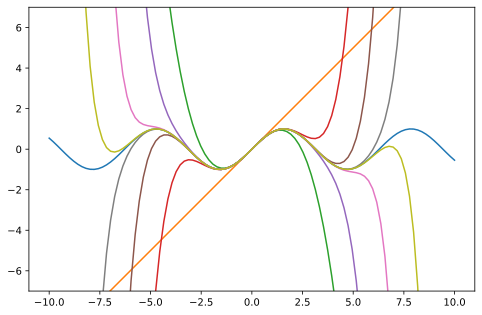

In [13]:
def plot_tylor(fx, n=3, step=2):
    ax = plt.figure(figsize=(8, 8)).add_subplot()
    ax.set_aspect("equal")

    X = np.linspace(-10, 10, 100)
    ax.set_ylim(-7, 7)
    ax.plot(X, sympy.lambdify(x, fx, 'numpy')(X), label=f"${sympy.latex(fx)}$")

    fxs = [fx, ]

    for i in range(n):
        dfx = sympy.diff(fx)
        fxs.append(dfx)
        fx = dfx

        if i % step == 0:
            continue

        px = 0
        for i, f in enumerate(fxs):
            px += (f.subs({x: 0}) / sympy.factorial(i)) * x ** i

        # display(fxs)
        display(px)

        ax.plot(X, sympy.lambdify(x, px, 'numpy')(X), label=f"${sympy.latex(px)}$")
    # ax.legend()


x = sympy.Symbol("x")
plot_tylor(sympy.sin(x), n=16)


## 证明

牛顿法：设 $x_0$ 为初始估计，则：

$\displaystyle
x_{i + 1} = x_i - {f(x_i) \over f'(x_i)}, i \in \mathbb{N}
$

通过实验，这个迭代过程似乎是成立的，但是这要求 $\varepsilon_{i+1} = |x - x_{i + 1}| < \varepsilon_{i} = |x - x_{i}|$ 才可以；换句话说，每次迭代的结果 $x_i$ 与根 $x$ 之间的距离会越来越近。


为证明上式成立，由泰勒公式：

$
\begin{aligned}
f(x) &= f(x_i) + f'(x_i)(x - x_i) + o(x - x_i) \\
\end{aligned}
$

其中我们将皮亚诺余项表示成拉格朗日余项：

$$
o(x - x_i) = {1 \over 2} f''(\xi_i) (x - x_i)^2
$$

其中 $\xi_i$ 在 $x$ 与 $x_i$ 之间，于是有：

$$
f(x) = 0 = f(x_i) + f'(x_i)(x - x_i) + {1 \over 2} f''(\xi_i) (x - x_i)^2 \\
$$

$$
f(x_i) + f'(x_i)(x - x_i) = - {f''(\xi_i) \over 2}  (x - x_i)^2 \\
$$

等式两边同时除以 $f'(x_i)$，则：

$$
{f(x_i) \over f'(x_i)} + (x - x_i) = - {f''(\xi_i) \over 2f'(x_i)}  (x - x_i)^2
$$

由于迭代公式：

$$
x - x_{i + 1} = - {f''(\xi_i) \over 2f'(x_i)}  (x - x_i)^2
$$

$$
\varepsilon_{i + 1} = - {f''(\xi_i) \over 2f'(x_i)} \varepsilon_i^2
$$

两边取绝对值：

$$
|\varepsilon_{i + 1}| = {|f''(\xi_i)| \over 2|f'(x_i)|} \varepsilon_i^2
$$

于是需要：

$$
|\varepsilon_{i + 1}| = {|f''(\xi_i)| \over 2|f'(x_i)|} \varepsilon_i^2 < |\varepsilon_i|
$$

$$
{|f''(\xi_i)| \over 2|f'(x_i)|} |\varepsilon_i| < 1
$$

为了得到 $|\varepsilon_{i + 1}| < |\varepsilon_i|$，需要在 $\varepsilon$ 的邻域 $I$ 内：

- $f'(x) \neq 0$
- $f''(x)$ 连续
- $M|\varepsilon_0| < 1$

其中

$$
M = {1 \over 2} \left(\sup_{x \in I} |f''(x)|\right) \left(\sup_{x \in I} {1 \over |f'(x)|}\right)
$$

于是：

$$
|\varepsilon_{n + 1}| = M\varepsilon_n^2 < |\varepsilon_n| 
$$

## 参考

- 索尔. 数值分析[M/OL]. 吴兆金, 王国英, 范红军, 译. <a href="https://book.douban.com/press/2609">人民邮电出版社</a><span><span class="pl"> 译者</span>: <a class="" href="/search/%E5%90%B4%E5%85%86%E9%87%91">吴兆金</a> / <a class="" href="/search/%E7%8E%8B%E5%9B%BD%E8%8B%B1">王国英</a> / <a class="" href="/search/%E8%8C%83%E7%BA%A2%E5%86%9B">范红军</a> </span>, 2010. https://book.douban.com/subject/4188358/.
- <https://en.wikipedia.org/wiki/Newton%27s_method>